# Text Analytics of Peruvian Rock Songs

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import string
import re
from collections import Counter
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
df = pd.read_csv('peruvian_punk_db.csv')
df.head()

,Band,Title,Year,Album,Lyrics
0,Inyectores,Orbital,2001.0,Bombardero,Hiéreme soy tu sueño que desaparece y vuelve\n...
1,Inyectores,Dias Oscuros,2008.0,Viaje al centro del olvido,Hoy quise dar\nlo que no quise perder ayer\ny ...
2,Inyectores,7 Vidas,2003.0,Rompecaminos,Vi crecer mil veces ideas acá\nvi sembrar sonr...
3,Inyectores,Orbital,2001.0,Bombardero,"Despega bombardero, vuela sobre\nel miedo de t..."
4,6 Voltios,Wirito,2003.0,Día Plastico,Ese wirito que te robaste\nte lo fumaste y te ...


In [3]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [5]:
" ".join(string.punctuation)

'! " # $ % & \' ( ) * + , - . / : ; < = > ? @ [ \\ ] ^ _ ` { | } ~'

In [6]:
df["lyrics_wo_punct"] = df["Lyrics"].apply(lambda text: remove_punctuation(text))
df.head()

,Band,Title,Year,Album,Lyrics,lyrics_wo_punct
0,Inyectores,Orbital,2001.0,Bombardero,Hiéreme soy tu sueño que desaparece y vuelve\n...,Hiéreme soy tu sueño que desaparece y vuelve\n...
1,Inyectores,Dias Oscuros,2008.0,Viaje al centro del olvido,Hoy quise dar\nlo que no quise perder ayer\ny ...,Hoy quise dar\nlo que no quise perder ayer\ny ...
2,Inyectores,7 Vidas,2003.0,Rompecaminos,Vi crecer mil veces ideas acá\nvi sembrar sonr...,Vi crecer mil veces ideas acá\nvi sembrar sonr...
3,Inyectores,Orbital,2001.0,Bombardero,"Despega bombardero, vuela sobre\nel miedo de t...",Despega bombardero vuela sobre\nel miedo de tu...
4,6 Voltios,Wirito,2003.0,Día Plastico,Ese wirito que te robaste\nte lo fumaste y te ...,Ese wirito que te robaste\nte lo fumaste y te ...


In [7]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [8]:
df['tokenized'] = df['lyrics_wo_punct'].map(lambda x: clean_text(x))
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].mean()

149.9090909090909

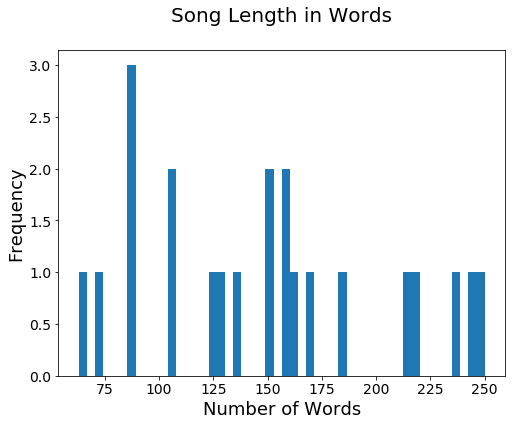

In [9]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(8,6))
ax.set_title('Song Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [10]:
#Stop words from Spanish in NLTK dictionary
", ".join(stopwords.words('spanish'))

'de, la, que, el, en, y, a, los, del, se, las, por, un, para, con, no, una, su, al, lo, como, más, pero, sus, le, ya, o, este, sí, porque, esta, entre, cuando, muy, sin, sobre, también, me, hasta, hay, donde, quien, desde, todo, nos, durante, todos, uno, les, ni, contra, otros, ese, eso, ante, ellos, e, esto, mí, antes, algunos, qué, unos, yo, otro, otras, otra, él, tanto, esa, estos, mucho, quienes, nada, muchos, cual, poco, ella, estar, estas, algunas, algo, nosotros, mi, mis, tú, te, ti, tu, tus, ellas, nosotras, vosotros, vosotras, os, mío, mía, míos, mías, tuyo, tuya, tuyos, tuyas, suyo, suya, suyos, suyas, nuestro, nuestra, nuestros, nuestras, vuestro, vuestra, vuestros, vuestras, esos, esas, estoy, estás, está, estamos, estáis, están, esté, estés, estemos, estéis, estén, estaré, estarás, estará, estaremos, estaréis, estarán, estaría, estarías, estaríamos, estaríais, estarían, estaba, estabas, estábamos, estabais, estaban, estuve, estuviste, estuvo, estuvimos, estuvisteis, estuvi

In [11]:
STOPWORDS = set(stopwords.words('spanish'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["lyrics_wo_stop"] = df["lyrics_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,Band,Title,Year,Album,Lyrics,lyrics_wo_punct,tokenized,num_wds,lyrics_wo_stop
0,Inyectores,Orbital,2001.0,Bombardero,Hiéreme soy tu sueño que desaparece y vuelve\n...,Hiéreme soy tu sueño que desaparece y vuelve\n...,hiéreme soy tu sueño que desaparece y vuelve h...,161,Hiéreme sueño desaparece vuelve Háblame aire q...
1,Inyectores,Dias Oscuros,2008.0,Viaje al centro del olvido,Hoy quise dar\nlo que no quise perder ayer\ny ...,Hoy quise dar\nlo que no quise perder ayer\ny ...,hoy quise dar lo que no quise perder ayer y vi...,183,Hoy quise dar quise perder ayer vi llorar hues...
2,Inyectores,7 Vidas,2003.0,Rompecaminos,Vi crecer mil veces ideas acá\nvi sembrar sonr...,Vi crecer mil veces ideas acá\nvi sembrar sonr...,vi crecer mil veces ideas acá vi sembrar sonri...,215,Vi crecer mil veces ideas acá vi sembrar sonri...
3,Inyectores,Orbital,2001.0,Bombardero,"Despega bombardero, vuela sobre\nel miedo de t...",Despega bombardero vuela sobre\nel miedo de tu...,despega bombardero vuela sobre el miedo de tu ...,151,Despega bombardero vuela miedo corazón Y surca...
4,6 Voltios,Wirito,2003.0,Día Plastico,Ese wirito que te robaste\nte lo fumaste y te ...,Ese wirito que te robaste\nte lo fumaste y te ...,ese wirito que te robaste te lo fumaste y te e...,129,Ese wirito robaste fumaste estoneaste volando ...


In [12]:
cnt = Counter()
for text in df["lyrics_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('luz', 23),
 ('solo', 23),
 ('nunca', 18),
 ('vez', 18),
 ('¡no', 18),
 ('q', 17),
 ('vida', 17),
 ('Y', 17),
 ('vivir', 17),
 ('historia', 17)]